In [33]:
from MyTT import *
import pandas as pd
import matplotlib.pyplot as plt

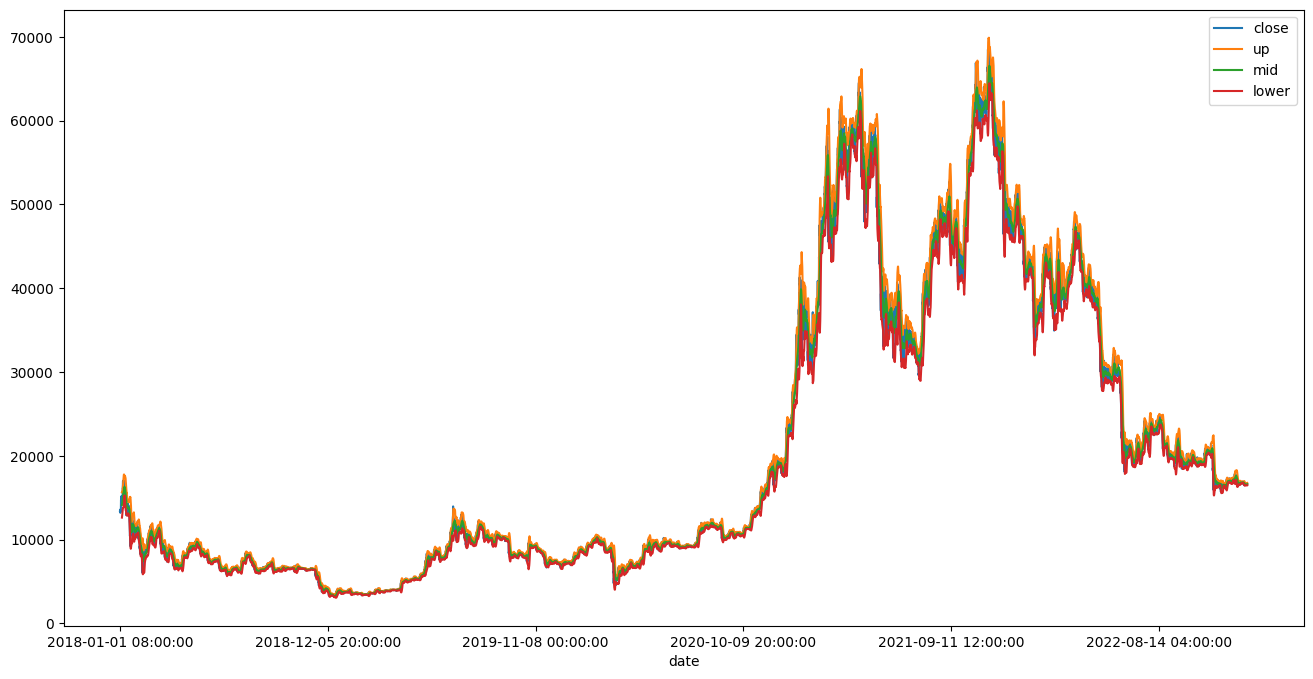

,close,up,mid,lower
date,,,,
2018-01-01 08:00:00,13410.03,NaN,NaN,NaN
2018-01-01 12:00:00,13570.35,NaN,NaN,NaN
2018-01-01 16:00:00,13220.56,NaN,NaN,NaN
2018-01-01 20:00:00,13247.00,NaN,NaN,NaN
2018-01-02 00:00:00,13240.37,NaN,NaN,NaN
...,...,...,...,...
2023-01-02 16:00:00,16735.11,16707.427,16577.972,16448.516
2023-01-02 20:00:00,16734.66,16728.329,16590.958,16453.587
2023-01-03 00:00:00,16737.56,16747.223,16603.022,16458.822


In [34]:
df = pd.read_csv('BTC18年4h数据表.csv')
# df['change'] = df.pct_change()
CLOSE = df['close']
df_close = df[['date', 'close']]
# df_close['change'] = (df['close'] - df['open']) / df['open']
up, mid, lower = BOLL(CLOSE, N=20, P=2)
df_boll = pd.DataFrame({'up': list(up), 'mid': list(mid), 'lower': list(lower)})
df_all = pd.concat([df_close, df_boll], axis=1).set_index('date')
df_all.plot(figsize=(16,8))
plt.show()
df_all

In [35]:
# 跌破买入，突破卖出
def signal_up(df_all):
    judge_1 = df_all['close'] <= df_all['lower']
    judge_2 = df_all['close'] >= df_all['up']
    df_all.loc[judge_1, 'signal_up'] = 1
    df_all.loc[judge_2, 'signal_up'] = 0
    return df_all

# 追涨杀跌
def signal_low(df_all):
    judge_1 = df_all['close'] <= df_all['lower']
    judge_2 = df_all['close'] >= df_all['up']
    df_all.loc[judge_1, 'signal_low'] = 0
    df_all.loc[judge_2, 'signal_low'] = 1
    return df_all

In [36]:
# 计算信号，并且填充信号
df_all = signal_up(df_all)
df_all = signal_low(df_all)
df_all['change'] = df_all['close'].pct_change().shift(-1)
df_all.fillna(method='ffill', inplace=True)
df_all.fillna(0, inplace=True)


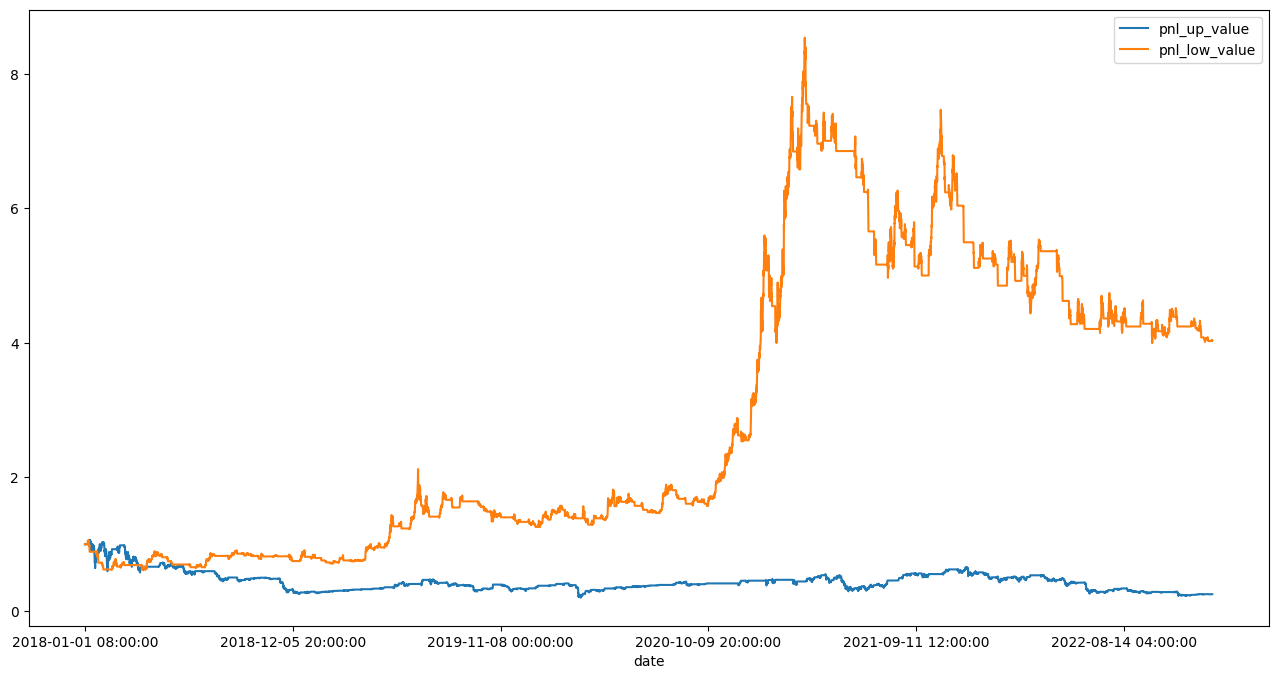

In [37]:
df_all['pnl_up'] = df_all['signal_up'] * df_all['change']
df_all['pnl_low'] = df_all['signal_low'] * df_all['change']

df_all['pnl_up_value'] = (df_all['pnl_up'] + 1).cumprod()  # 累计复利增长
df_all['pnl_low_value'] = (df_all['pnl_low'] + 1).cumprod()  # 累计复利增长

df_all[['pnl_up_value','pnl_low_value']].plot(figsize=(16,8))
plt.show()